# ARCH Autoregressive Conditional Heteroskedasticity Models

In [ ]:
# Standard librariees
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame

#Statistics
from scipy import stats

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
# Libraries for time series analysis
import os
import sys

import pandas_datareader.data as web

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as smtools
import scipy.stats as scs
from arch import arch_model

In [4]:
df = pd.read_stata('returns.dta')

In [5]:
df.head()

,nasdaq,allords,ftse,nikkei
0,4.206781,-4.882426,4.459137,9.115322
1,6.268737,-0.510409,-1.236110,6.637041
2,2.049694,12.385007,-1.498049,3.949798
3,1.220498,2.896332,3.368728,4.373625
4,-2.375028,7.258236,-0.992592,-0.061986


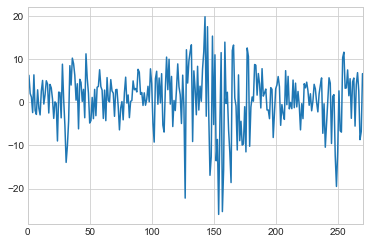

In [6]:
df['nasdaq'].plot() 
plt.show()

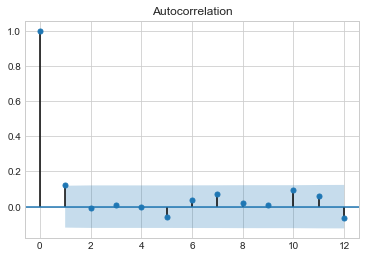

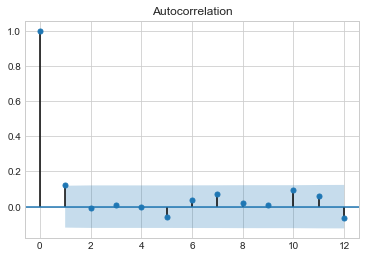

In [17]:
# Look at the ACF for this data
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['nasdaq'],lags=12)

In [16]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['nasdaq'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.418035
p-value: 0.000000
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573


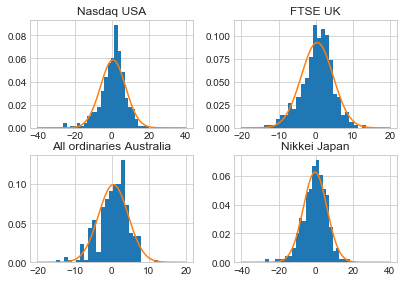

In [52]:
plt.subplot(2,2,1) 
plt.hist(df['nasdaq'], bins=25, normed=True)
# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(df['nasdaq']))
# lets try the normal distribution first
m, s = stats.norm.fit(df['nasdaq']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.title('Nasdaq USA')

plt.subplot(2,2,2)
plt.hist(df['ftse'], bins=25, normed=True)
# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(df['ftse']))
# lets try the normal distribution first
m, s = stats.norm.fit(df['ftse']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.title('FTSE UK')

plt.subplot(2,2,3)
plt.hist(df['allords'], bins=25, normed=True)
# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(df['allords']))
# lets try the normal distribution first
m, s = stats.norm.fit(df['allords']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.title('All ordinaries Australia')

plt.subplot(2,2,4)
plt.hist(df['nikkei'], bins=25, normed=True)
# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(df['nikkei']))
# lets try the normal distribution first
m, s = stats.norm.fit(df['nikkei']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it
plt.title('Nikkei Japan')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.25)


plt.show()


In [18]:
df1 = pd.read_stata('byd.dta')

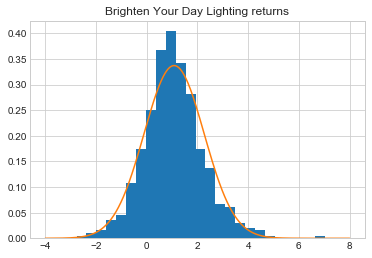

In [39]:
plt.hist(df1['r'], bins=25, normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(df1['r']))

# lets try the normal distribution first
m, s = stats.norm.fit(df1['r']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

plt.title('Brighten Your Day Lighting returns')
plt.show() 

In [25]:
model=arch_model(df1['r'], vol='Arch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 740.9227025079724
Iteration:      2,   Func. Count:     13,   Neg. LLF: 740.812867099595
Iteration:      3,   Func. Count:     21,   Neg. LLF: 740.8000487815001
Iteration:      4,   Func. Count:     28,   Neg. LLF: 740.7801684780742
Iteration:      5,   Func. Count:     33,   Neg. LLF: 740.7799802831372
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 740.7799802830781
            Iterations: 5
            Function evaluations: 33
            Gradient evaluations: 5
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      r   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -740.780
Distribution:                  Normal   AIC:                           1487.56
Method:            Maximum Likelihood 

-0.787047511462


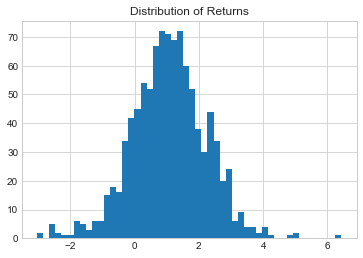

In [32]:
forecasts = results.forecast(horizon=30, method='simulation', simulations=1000)
sims = forecasts.simulations

print(np.percentile(sims.values[-1,:,-1].T,5))
plt.hist(sims.values[-1, :,-1],bins=50)
plt.title('Distribution of Returns')
plt.show()

In [33]:
model=arch_model(df1['r'], vol='Garch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 749.8444159347453
Iteration:      2,   Func. Count:     14,   Neg. LLF: 749.5389856671503
Iteration:      3,   Func. Count:     21,   Neg. LLF: 742.2569369681439
Iteration:      4,   Func. Count:     29,   Neg. LLF: 741.2296944962775
Iteration:      5,   Func. Count:     36,   Neg. LLF: 738.0017315102109
Iteration:      6,   Func. Count:     43,   Neg. LLF: 737.0141275619181
Iteration:      7,   Func. Count:     50,   Neg. LLF: 736.088087825759
Iteration:      8,   Func. Count:     57,   Neg. LLF: 736.0250628632077
Iteration:      9,   Func. Count:     63,   Neg. LLF: 736.0199917827177
Iteration:     10,   Func. Count:     69,   Neg. LLF: 736.0195776855105
Iteration:     11,   Func. Count:     75,   Neg. LLF: 736.0195397440009
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 736.0195397440903
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 11